# Checking what operating range is required of the heat pump

Number of fan coils required: 64


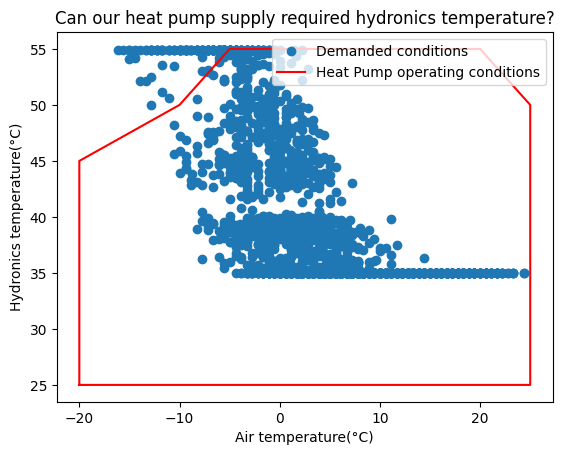

In [ ]:
from Modules.Heating import Heating_Distribution
import Modules.Data as Data
import matplotlib.pyplot as plt
import numpy as np

heat_pump_capacity = 305
HVAC_capacity = 175

HD = Heating_Distribution("Data/HFP-550LM-Z1", heat_pump_capacity, HVAC_capacity)

air_temp = Data.column_from_csv("Data/XL-BES-Tool_Output.csv", "External temperture (ºC)") 
heating_demand = Data.column_from_csv("Data/XL-BES-Tool_Output.csv", "Heating_thermal_load(kW)")  

heating_demand = np.clip(heating_demand, 0, heat_pump_capacity)

indices = [i for i, x in enumerate(heating_demand) if x == 0]
heating_demand = np.delete(heating_demand, indices)
air_temp = np.delete(air_temp, indices)

hydronics_temp = HD.interp_flow_temp_heating(heating_demand)

plt.plot(air_temp, hydronics_temp, marker="o", label="Demanded conditions", linestyle="None")

# HP operating conditions

air_temp_op_conditions = np.array([-20, 25, 25, 20, 20, -5, -10, -15, -20, -20])
hydronics_temp_op_conditions = np.array([25, 25, 50, 55, 55, 55, 50, 45, 45, 25])
plt.plot(air_temp_op_conditions, hydronics_temp_op_conditions, color="red", label="Heat Pump operating conditions")
plt.xlabel("Air temperature(°C)")
plt.ylabel("Hydronics temperature(°C)")
plt.title("Can our heat pump supply required hydronics temperature?")
plt.legend(loc='upper right')

Number of fan coils required: 64


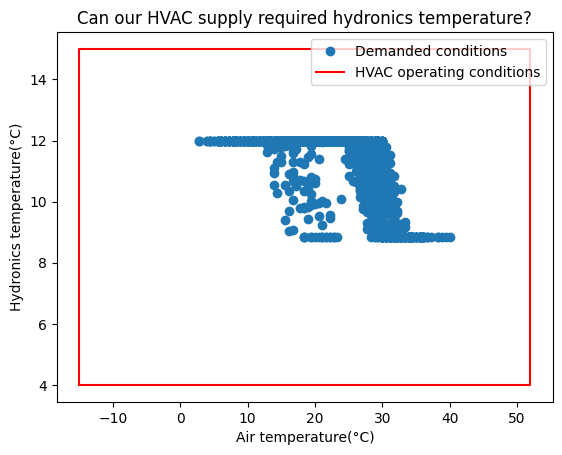

In [2]:
from Modules.Heating import Heating_Distribution
import Modules.Data as Data
import matplotlib.pyplot as plt
import numpy as np

heat_pump_capacity = 305
HVAC_capacity = 175

HD = Heating_Distribution("Data/HFP-550LM-Z1", heat_pump_capacity, HVAC_capacity)

# Cooling conditions

plt.figure(2)

air_temp = Data.column_from_csv("Data/XL-BES-Tool_Output.csv", "External temperture (ºC)") 
cooling_demand = Data.column_from_csv("Data/XL-BES-Tool_Output.csv", "Cooling_thermal_load(kW)")  

cooling_demand = np.clip(cooling_demand, 0, HVAC_capacity)

indices = [i for i, x in enumerate(cooling_demand) if x == 0]
cooling_demand = np.delete(cooling_demand, indices)
air_temp = np.delete(air_temp, indices)

hydronics_temp = HD.interp_flow_temp_cooling(cooling_demand)

plt.plot(air_temp, hydronics_temp, marker="o", label="Demanded conditions", linestyle="None")

air_temp_op_conditions = np.array([-15, -15, 52, 52, -15])
hydronics_temp_op_conditions = np.array([4, 15, 15, 4, 4])
plt.plot(air_temp_op_conditions, hydronics_temp_op_conditions, color="red", label="HVAC operating conditions")
plt.xlabel("Air temperature(°C)")
plt.ylabel("Hydronics temperature(°C)")
plt.title("Can our HVAC supply required hydronics temperature?")
plt.legend(loc='upper right')